# **Tutorial for DICAlignedGrid model component**

DIC Aliged Grid serves implements the transformation of the displacement an position fields provided in `DICGrid` to 
a local coordinate system that is defined by choosing two markers with the horizontal and vertical indexes denoted as $M_0 := [I_0, J_0]$ and $M_1 := [I_1, J_1]$, respectively. Thus, the coordinates of the markers are obtained from the grid at initial state $X_{0I_0J_0a}$ and $X_{0I_1J_1a}$. In an intermediate state denoted by the history index $T$, these markers are at the positions $X_{TI_0J_0a}$ and $X_{TI_1J_1a}$. The black markers represent the initial and intermediate configurations of the reference frame.

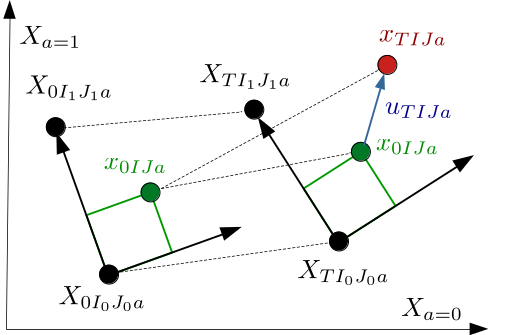

The aligned grid takes the indexes $I_0, J_0, I_1, J_0$ as input and returns the displacement vectors relative to local coordinate system for the history index $T$. This coordinate transformation provides the basis for the investigation of the kinematics which is relative to the predefined frame. In some shear crack propagation models through reinforced concrete beams, the kinematics related to two neighboring teeths is introduced to deliver analytical solution of the intermediate or ultimate states of a shear crack zone.

The relative displacement in the configuration $T$ is obtained as
$$u_{TIJa} = x_{TIJa} - x_{0IJa}.$$

where $x_{0IJa}$ represents the initial relative position to the reference coordinate system in the initial and intermediate configurations. The global coordinates of this point provided by the `DICGrid` are available as $X_{0IJa}$ and $X_{TIJa}$. To obtain the local coordinates, we need to make a pull and rotate operation by setting 
\begin{align}
\Delta X_{0IJa} &= X_{0IJa} - X_{0I_0J_0a}, \\
\Delta X_{TIJa} &= X_{TIJa} - X_{TI_0J_0a},
\end{align}

and rotating the two coordinate systems by the angles $\alpha_0$ and $alpha_T$ between the vertical axis and the lines ($X_{0I_0J_0a}X_{0I_1J_1a}$) and ($X_{TI_0J_0a}X_{TI_1J_1a}$), respectively. These angles are obtained as
\begin{align}
 \alpha_0 &= \arctan\left(\frac{X_{0I_1J_10} - X_{0I_0J_00}}{X_{0I_1J_11} - X_{0I_0J_01}}\right), \\
 \alpha_T &= \arctan\left(\frac{X_{TI_1J_10} - X_{TI_0J_00}}{X_{TI_1J_11} - X_{TI_0J_01}}\right). \\
\end{align}

Using the rotation angle, the rotation matrix for all markers $I, J$ in the initial and intermediate configurations reads
\begin{align}
 \Theta_{0ab} &= \left[
 \begin{array}{rr}
 \cos(\alpha_0) & -\sin(\alpha_0) \\
 \sin(\alpha_0) & \cos(\alpha_0)
 \end{array}
 \right]\\
 \Theta_{Tab} &= \left[
 \begin{array}{rr}
 \cos(\alpha_T) & -\sin(\alpha_T) \\
 \sin(\alpha_T) & \cos(\alpha_T)
 \end{array}
 \right]
\end{align}

The local coordinates are then obtained as
\begin{align}
 x_{0IJb} = \Delta X_{0IJa} \Theta_{0ab} \\
 x_{TIJb} = \Delta X_{TIJa} \Theta_{Tab}
\end{align}

In [ ]:
%matplotlib widget

In [ ]:
from bmcs_shear.api import DICInpUnstructuredPoints, DICGrid, DICStateFields
from bmcs_shear.dic_crack.dic_aligned_grid import DICAlignedGrid

In [ ]:
from bmcs_shear.api import DICGrid, DICInpUnstructuredPoints
dic_points = DICInpUnstructuredPoints(U_factor=10, dir_name='B1_TV1', t=1,
                                      T_stepping='delta_T')
dic_points.read_beam_design()
dic_grid = DICGrid(dic_inp=dic_points)

In [ ]:
dsf = DICStateFields(dic_grid=dic_grid)

In [ ]:
dic_a_grid = DICAlignedGrid(dsf=dsf, x0=500, y0=50, x1=400, y1=200, U_factor=50,
                           X_0_MNa=dsf.X_ipl_MNa[-20:,-20:,:])

In [ ]:
dic_a_grid.interact()